# Regressão logística

## Importando as libs

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

## Base de dados risco credito - Exemplo didático

### Importando a base de dados

In [2]:
with open('./data/risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [3]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [4]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [5]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

### Analise dos dados

In [6]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [7]:
logistic_risco_credito.intercept_

array([-0.80828993])

In [8]:
logistic_risco_credito.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

### Predições testes

In [9]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsao = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)

In [10]:
del X_risco_credito, y_risco_credito
del logistic_risco_credito, previsao

## Base credit data - Resultado da análise: 94.4%

### Importando a base de dados

In [11]:
with open('./data/credit.pkl', 'rb') as f:
    X_train_credit, y_train_credit, X_test_credit, y_test_credit = pickle.load(f)

In [12]:
X_train_credit.shape, y_train_credit.shape

((1500, 3), (1500,))

In [13]:
X_test_credit.shape, y_test_credit.shape

((500, 3), (500,))

### Experimentando o modelo

In [14]:
# Instanciando e treinando o modelo
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_train_credit, y_train_credit)

LogisticRegression(random_state=1)

In [15]:
logistic_credit.intercept_

array([-6.00121277])

In [16]:
logistic_credit.coef_

array([[-2.54872075, -3.69553647,  3.94285136]])

In [17]:
# Realizando as predições
y_pred = logistic_credit.predict(X_test_credit)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
# Valores reais
y_test_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Análise dos resultados

In [19]:
accuracy_score(y_test_credit, y_pred)

0.944

In [20]:
confusion_matrix(y_test_credit, y_pred)

array([[422,  14],
       [ 14,  50]])

0.944

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


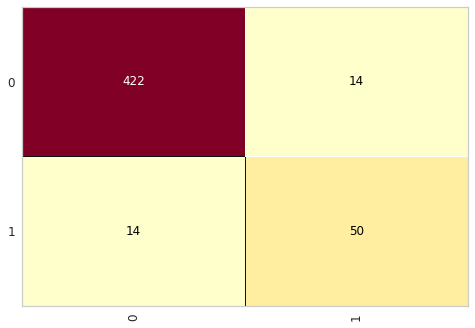

In [21]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_train_credit, y_train_credit)
cm.score(X_test_credit, y_test_credit)

In [22]:
print(classification_report(y_test_credit, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.78      0.78      0.78        64

    accuracy                           0.94       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.94      0.94      0.94       500



In [23]:
del X_train_credit, y_train_credit, X_test_credit, y_test_credit
del logistic_credit, y_pred, cm

## Base census data - Resultado da análise: 85%

### Importando a base de dados

In [24]:
with open('./data/census.pkl', 'rb') as f:
    X_train_census, y_train_census, X_test_census, y_test_census = pickle.load(f)

In [25]:
X_train_census.shape, y_train_census.shape

((24420, 108), (24420,))

In [26]:
X_test_census.shape, y_test_census.shape

((8141, 108), (8141,))

### Experimentando o modelo

In [27]:
logistic_census = LogisticRegression(random_state=1)
logistic_census.fit(X_train_census, y_train_census)

LogisticRegression(random_state=1)

In [28]:
y_pred = logistic_census.predict(X_test_census)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [29]:
y_test_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

### Análise dos resultados

In [30]:
accuracy_score(y_test_census, y_pred)

0.8502640953199853

0.8502640953199853

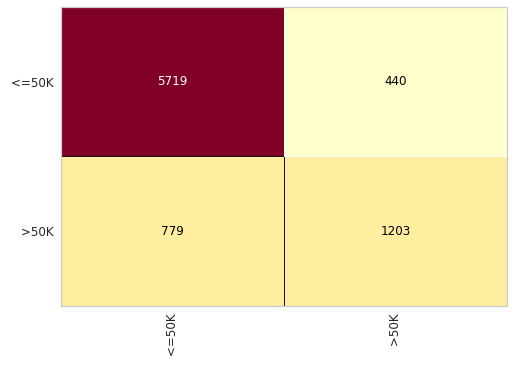

In [31]:
cm = ConfusionMatrix(logistic_census)
cm.fit(X_train_census, y_train_census)
cm.score(X_test_census, y_test_census)

In [32]:
print(classification_report(y_test_census, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6159
        >50K       0.73      0.61      0.66      1982

    accuracy                           0.85      8141
   macro avg       0.81      0.77      0.78      8141
weighted avg       0.84      0.85      0.85      8141



In [33]:
del X_train_census, y_train_census, X_test_census, y_test_census
del logistic_census, y_pred, cm